<a href="https://colab.research.google.com/github/Sagar523-gif/PYTHON/blob/main/Machine%20Learning%20Model%20Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install scikit-learn pandas matplotlib


In [16]:
import pandas as pd

# Example: Download a sample dataset (adjust URL as needed)
!wget https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv -O sms_spam.csv

df = pd.read_csv('sms_spam.csv', sep='\t', names=['label', 'message'])
df.head()


--2025-06-20 17:36:26--  https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477907 (467K) [text/plain]
Saving to: ‘sms_spam.csv’

sms_spam.csv        100%[===================>] 466.71K  --.-KB/s    in 0.03s   

2025-06-20 17:36:26 (14.0 MB/s) - ‘sms_spam.csv’ saved [477907/477907]



,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split data
X = df['message']
y = df['label'].map({'ham': 0, 'spam': 1})

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix:
[[966   0]
 [ 45 104]]


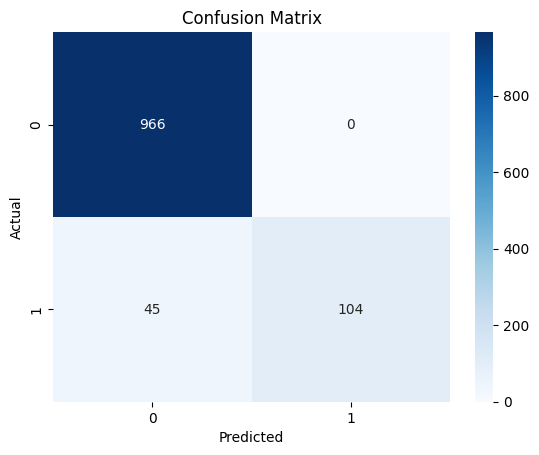

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
